<a href="https://colab.research.google.com/github/bitanb1999/HiggsBosonChallenge/blob/main/RandomForestandBoostingandComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Pre-requisites:**

In [1]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   1282      0 --:--:-- --:--:-- --:--:--  1282
     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 686kB 7.4MB/s 
     |████████████████████████████████| 942kB 11.8MB/s 
     |████████████████████████████████| 112kB 33.6MB/s 
  Found existing installation: cloudpickle 1.3.0
    Uninstalling cloudpickle-1.3.0:
      Successfully uninstalled cloudpickle-1.3.0
  Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0
  Found existing installation: distributed 1.25.3
    Uninstalling distributed-1.25.3:
      Successfully uninstalled distributed-1.

In [2]:
!pip install dtreeviz
from dtreeviz.trees import dtreeviz

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3-cp37-none-any.whl size=66642 sha256=a616a9c0597027bf9aee3db5a0ca8f5d29c2781f830a85b38e669820a1ef8cf8
  Stored in directory: /root/.cache/pip/wheels/60/36/b1/188ee35c677e48463f6482d580f81c19f5f82ae5adbe293fd8
Successfully built dtreeviz


In [3]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-cp37-none-any.whl size=10670 sha256=0f2d81cbfd61eb88b2e484b7062bb5a56170cd96d9369b57cfaf03cccbe6f188
  Stored in directory: /root/.cache/pip/wheels/16/08/23/9d90df482c9c943df4d6fe874c0937f8e81dc3db917c9300c2
Successfully built rfpimp


In [4]:
!pip install -U imbalanced-learn

     |████████████████████████████████| 215kB 8.3MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3


In [5]:

%matplotlib inline
#importing libraries
import numpy as np
import scipy.stats
import scipy.special
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import cm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Activation, Reshape
from keras.layers import Concatenate
from keras.layers.embeddings import Embedding
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.inspection import permutation_importance
import pickle
import csv
import collections
from rfpimp import *
from rfpimp import plot_corr_heatmap
from datetime import datetime
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix
import math
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import graphviz
from dtreeviz.trees import dtreeviz

from sklearn.calibration import calibration_curve

from itertools import product
from collections import OrderedDict

# Datasets:

In [ ]:
training=pd.read_csv("training.csv")
training.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
testing=pd.read_csv("test.csv")
testing.set_index('EventId',inplace=True)
testing.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
EventId,,,,,,,,,,,,,,,,,,,,,
350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,56.018,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,132.865,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,97.600,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,94.112,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,721.552,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


*Here, we have the two datasets of the Higg Boson Challenge of 2014 which had the data for categorising the events as either a signal event or a background event. The accuracy of the classification model is to be calculated using the approximate median significance. The weights of each of the cases are also given.*

In [ ]:
print(training.shape,testing.shape)

(250000, 33) (550000, 30)


In [ ]:
train_dataX=training.drop(["Weight","Label"],axis=1)
train_dataX.set_index('EventId',inplace=True)
train_dataY=training['Label']


In [ ]:
train_dataY=pd.factorize(train_dataY)[0]

In [ ]:
from IPython.display import display, HTML

def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )
def tbl_report(tbl, cols=None, card=10):
    print("Table Shape", tbl.shape)
    dtypes = tbl.dtypes
    nulls = []
    uniques = []
    numuniques = []
    vcs = []
    for col in dtypes.index:
        n = tbl[col].isnull().sum()
        nulls.append(n)
        strdtcol = str(dtypes[col])
        #if strdtcol == 'object' or strdtcol[0:3] == 'int' or strdtcol[0:3] == 'int':
        #print(strdtcol)
        uniqs = tbl[col].unique()
        uniquenums = uniqs.shape[0]
        if uniquenums < card: # low cardinality
            valcounts = pd.value_counts(tbl[col], dropna=False)
            vc = "\n".join(["{}:{}".format(k,v) for k, v in valcounts.items()])
        else:
            vc='HC' # high cardinality
        uniques.append(uniqs)
        numuniques.append(uniquenums)
        vcs.append(vc)
    nullseries = pd.Series(nulls, index=dtypes.index)
    uniqueseries = pd.Series(uniques, index=dtypes.index)
    numuniqueseries = pd.Series(numuniques, index=dtypes.index)
    vcseries = pd.Series(vcs, index=dtypes.index)
    df = pd.concat([dtypes, nullseries, uniqueseries, numuniqueseries, vcseries], axis=1)
    df.columns = ['dtype', 'nulls', 'uniques', 'num_uniques', 'value_counts']
    if cols:
        return pretty_print(df[cols])
    return pretty_print(df)

**We will have a look at our training dataset before we run any EDA,Feature Engineering or Modelling**

In [ ]:
tbl_report(train_dataX)

Table Shape (250000, 30)


,dtype,nulls,uniques,num_uniques,value_counts
DER_mass_MMC,float64,0,"[138.47, 160.937, -999.0, 143.905, 175.864, 89.744, 148.754, 154.916, 105.594, 128.053, 114.744, 145.297, 82.488, 111.02600000000001, 114.256, 127.861, 90.736, 87.075, 141.481, 110.785, 76.883, 137.197, 111.271, 118.104, 98.76100000000001, 121.681, 129.186, 123.11200000000001, 156.894, 72.712, 134.153, 155.487, 138.362, 120.506, 109.684, 90.833, 122.516, 132.049, 84.86, 27.788, 201.47299999999998, 130.079, 167.53400000000002, 95.40700000000001, 219.05700000000002, 104.14200000000001, 219.292, 51.025, 148.523, 104.221, 73.819, 103.646, 122.934, 139.394, 92.065, 92.696, 83.081, 123.715, 94.229, 88.53200000000001, 101.675, 120.25299999999999, 96.906, 92.22200000000001, 98.59700000000001, 239.551, 86.62899999999999, 132.35, 123.29, 84.60799999999999, 166.64, 145.99, 99.66799999999999, 199.9, 92.079, 117.24700000000001, 235.976, 151.45, 124.118, 96.97, 96.37899999999999, 111.35600000000001, 98.181, 113.75, 124.575, 77.578, 107.35, 90.801, 95.787, 101.079, 130.123, 130.634, 208.57299999999998, 91.616, 109.829, 90.331, 114.661, 139.756, 87.523, 287.995, ...]",108338,HC
DER_mass_transverse_met_lep,float64,0,"[51.655, 68.768, 162.172, 81.417, 16.915, 13.55, 28.862, 10.418, 50.559, 88.941, 86.24, 10.286, 64.234, 31.663, 109.412, 32.096, 4.351, 50.953, 85.186, 88.76700000000001, 89.705, 18.674, 38.217, 0.736, 72.92699999999999, 34.384, 68.009, 27.18, 2.633, 14.024000000000001, 91.316, 6.041, 64.045, 62.758, 39.256, 20.761999999999997, 23.855999999999998, 61.071999999999996, 38.034, 22.729, 42.663999999999994, 62.236000000000004, 50.183, 65.682, 33.705999999999996, 68.032, 23.002, 53.335, 41.277, 21.584, 72.461, 37.94, 83.92399999999999, 98.947, 74.6, 50.315, 110.686, 31.910999999999998, 13.815999999999999, 83.73700000000001, 40.918, 73.141, 71.611, 65.274, 51.669, 63.333999999999996, 57.088, 78.683, 16.345, 72.911, 30.144000000000002, 70.619, 71.751, 16.05, 65.71, 41.715, 118.68299999999999, 33.856, 65.858, 52.95399999999999, 50.05, 65.312, 15.868, 68.862, 25.986, 71.692, 78.686, 42.327, 102.167, 55.918, 39.326, 59.132, 61.769, 17.118, 20.265, 68.298, 52.067, 34.558, 72.277, 20.354, ...]",101637,HC
DER_mass_vis,float64,0,"[97.82700000000001, 103.235, 125.95299999999999, 80.943, 134.805, 59.148999999999994, 107.78200000000001, 94.714, 100.98899999999999, 69.27199999999999, 79.692, 75.712, 103.565, 64.128, 14.398, 75.271, 67.96300000000001, 77.267, 68.827, 115.05799999999999, 41.765, 60.231, 67.041, 111.581, 82.775, 56.993, 78.296, 70.642, 77.31, 74.23, 51.771, 73.202, 69.499, 86.70200000000001, 122.89399999999999, 50.255, 100.96, 125.01299999999999, 99.038, 88.889, 86.064, 53.228, 87.682, 87.93700000000001, 67.847, 23.53, 104.041, 97.435, 123.30799999999999, 67.766, 124.835, 69.029, 136.15200000000002, 85.40799999999999, 177.143, 46.006, 65.44800000000001, 97.49700000000001, 71.225, 60.659, 64.244, 68.069, 78.711, 53.52, 68.835, 60.631, 81.811, 69.352, 50.14, 49.453, 82.176, 81.22399999999999, 74.602, 64.76899999999999, 56.525, 78.618, 193.111, 67.5, 106.57, 76.946, 63.451, 50.047, 80.477, 97.34200000000001, 60.637, 52.778999999999996, 167.085, 71.28, 79.738, 175.74400000000003, 108.26799999999999, 77.775, 93.213, 63.373000000000005, 50.19, 77.21600000000001, 76.262, 100.197, 58.168, 77.755, ...]",100558,HC
DER_pt_h,float64,0,"[27.98, 48.146, 35.635, 0.414, 16.405, 116.344, 106.13, 29.169, 4.288, 193.392, 27.201, 30.816, 106.999, 8.232000000000001, 17.323, 23.066999999999997, 47.221000000000004, 26.967, 5.042, 15.337, 18.437, 25.156, 2.347, 174.075, 30.888, 5.569, 35.332, 144.766, 91.38799999999999, 132.806, 33.742, 198.114, 63.165, 39.900999999999996, 71.682, 39.263000000000005, 9.377, 2.7680000000000002, 65.021, 35.999, 0.23, 21.581, 102.40299999999999, 0.861, 18.079, 33.375, 60.49, 1.382, 9.908999999999999, 1.482, 5.506, 50.58, 40.286, 1.578, 2.423, 1.3030000000000002, 49.395, 171.074, 27.029, 43.435, 135.726, 4.647, 28.947, 28.173000000000002, 39.384, 38.653, 53.611

Our dataset has one categorical variable and rest all continuous variable.

In [ ]:
cat_vars=['PRI_jet_num']
cont_vars=np.array(train_dataX.drop('PRI_jet_num',axis=1).columns)

In [ ]:
cont_vars

array(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta',
       'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi',
       'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt'], dtype=object)

# Models:

#### Helper Function:

In [ ]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None,oob_func=False):
    if ((not oob_func) and score_func):
        print("SCORE FUNC", score_func)
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    
    elif oob_func:
        print("OOB_Score")
        
        results = {}
        estimators= {}
        for n_est,mf,md in product(*parameters.values()):
            
            params = (n_est,mf,md)
            
            clf = RandomForestClassifier(random_state = 2017, n_estimators = n_est, max_features = mf, max_depth = md, oob_score=True, n_jobs = -1)
            
            clf.fit(X,y)
            
            results[params] = clf.oob_score_
            estimators[params] = clf
            
        outparams = max(results, key = results.get)
        
        print("Best Params: ",outparams)
        best_estimator = estimators[outparams]
        
        print("Training Score: ",best_estimator.score(X, y)) 
        print("OOB Score: ",best_estimator.oob_score_)
        
        return best_estimator

        
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print("BEST", gs.best_params_, gs.best_score_)
    best = gs.best_estimator_
    return best

def do_classify(clf, parameters, indf,y,score_func, n_folds=5, n_jobs=1,oob_func=False):
    X=indf
    y=y
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=2017)
    
    if oob_func:
        
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, oob_func=True)
        
    else:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("############# based on standard predict ################")
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    print(confusion_matrix(ytest, clf.predict(Xtest)))
    print("########################################################")
    plot_confusion_matrix(clf,Xtest,ytest,cmap="Blues")
    return clf, Xtrain, ytrain, Xtest,ytest

In [ ]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5,  proba=True, skip=0, initial = False):
    if not ax:
        ax=plt.gca()
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', lw=2, alpha=0.4, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', lw=2, alpha=0.4, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [ ]:
def make_pr(name,clf,ytest,xtest,ax=None):
    
    scores = clf.predict_proba(xtest)[:,1]
    precision, recall, _ = precision_recall_curve(ytest, scores)
    
    ax.plot(recall,precision,'*-',label="Precision-Recall Curve for %s (area = %0.2f)" % (name,average_precision_score(ytest,scores)) )
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,1.01])
    ax.set_xlabel('Recall', fontsize=12)
    ax.set_ylabel('Precision', fontsize=12)
    ax.grid()
    plt.tight_layout()
    plt.legend()
    return ax
    

In [ ]:
def calibration_plot(name,clf, xtest, ytest):

    fig, ax = plt.subplots(2,1,figsize=(8,15))

    #your code here
    fop, mpv = calibration_curve(ytest,clf.predict_proba(xtest)[:,1], n_bins=20)

    count = 0
    ax[0].plot(mpv, fop, marker='*',label="Calibration curve for %s" %(name))
    ax[0].plot([0,1],[0,1])

    ax[1].hist(clf.predict_proba(xtest)[:, 1], range=(0, 1), bins=20)

    rect=ax[1].patches


    # y_error = []
    # for r,i in enumerate(rect):
    #   # print(fop[r],i.get_height())

    #   y_error.append(math.sqrt( fop[r]*(1-fop[r]) / i.get_height() ))

    #   # print("Sigma = ",math.sqrt( fop[r]*(1-fop[r]) / i.get_height() ) )
    #   count+=i.get_height()

    
    # ax[0].errorbar(mpv, fop, yerr = y_error,marker = "o")

    fig.legend()

In [ ]:
def p_importance(model, cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

### Baseline Model using LogisticRegression:

SCORE FUNC roc_auc
BEST {'model__C': 1000} 0.815833480462113
############# based on standard predict ################
Accuracy on training data: 0.75
Accuracy on test data:     0.75
[[ 9212  7887]
 [ 4493 28408]]
########################################################


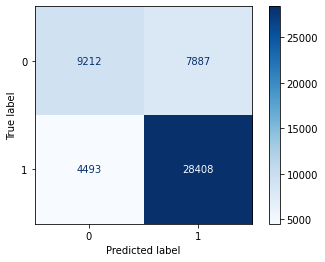

In [ ]:
# set up standardization
ss = StandardScaler()
# oe hot encoding
oh = OneHotEncoder()
# continuous variables need to be standardized
cont_pipe = Pipeline([("scale", ss)])
# categorical variables need to be one hot encoded
cat_pipe = Pipeline([('onehot', oh)])
# combine both into a transformer
transformers = [('cont', cont_pipe, cont_vars), ('cat', cat_pipe, cat_vars)]
# apply transformer to relevant columns. Nothing will be done for the rest
ct = ColumnTransformer(transformers=transformers, remainder="passthrough")
# create a pipeline so that we are not leaking data from validation to train in the individual folds
pipe = Pipeline(steps=[('ct', ct), ('model', LogisticRegression(max_iter=10000, penalty='l2'))])
# in paramgrid we dont use C but use model__C corresponding to the name in the pipeline
paramgrid = dict(model__C=[1000, 100, 10, 1, 0.1, 0.01, 0.001])

lr,Xtrain,ytrain,Xtest,ytest=do_classify(pipe, paramgrid,train_dataX, 
                              train_dataY, 
                              score_func='roc_auc')

### Upsampling and DownSampling:

In [ ]:
over = SMOTE(sampling_strategy='auto', k_neighbors=2)
under = RandomUnderSampler(sampling_strategy='auto')
steps = [('o', over), ('u', under)]
pipeline = imblearn.pipeline.Pipeline(steps=steps)
X, y = pipeline.fit_resample(train_dataX,train_dataY)
counter = collections.Counter(y)
print(counter)

Counter({0: 164333, 1: 164333})


### Baseline Model using Decision Tree Classifier:

SCORE FUNC roc_auc
BEST {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4} 0.8818705806094034
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.82
[[12220  4879]
 [ 4204 28697]]
########################################################


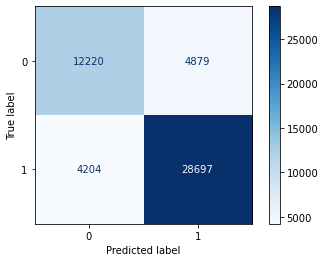

In [ ]:
clf=DecisionTreeClassifier(random_state=2017)
parameters={'max_depth':range(1,9),'min_samples_leaf':range(3,5),'criterion':['gini']}
clf, Xtrain, ytrain, Xtest,ytest=do_classify(clf, parameters,train_dataX,train_dataY,'roc_auc',n_folds=5,n_jobs=-1)

SCORE FUNC roc_auc
BEST {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4} 0.8818705806094034
############# based on standard predict ################
Accuracy on training data: 0.83
Accuracy on test data:     0.82
[[12220  4879]
 [ 4204 28697]]
########################################################


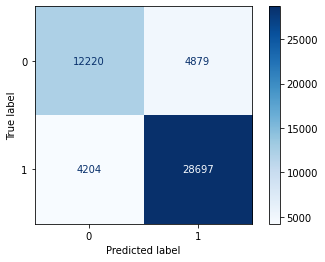

In [ ]:
clf=DecisionTreeClassifier(random_state=2017)
parameters={'criterion': ['gini'], 'max_depth': [8], 'min_samples_leaf': [4]}

clf, Xtrain, ytrain, Xtest,ytest=do_classify(clf, parameters,train_dataX,train_dataY,'roc_auc',n_folds=5,n_jobs=-1)


In [ ]:
def p_importance(model, cols, fi, fistd = 0):
    return pd.DataFrame({'features':cols, 'importance':fi, 'importance_std': fistd}
                       ).sort_values('importance', ascending=False)

In [ ]:
##taking only those features which are important
features=['DER_mass_MMC','DER_mass_transverse_met_lep','DER_mass_vis','DER_deltar_tau_lep','PRI_tau_pt','DER_met_phi_centrality','DER_pt_h','PRI_met']

In [ ]:
features

['DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_deltar_tau_lep',
 'PRI_tau_pt',
 'DER_met_phi_centrality',
 'DER_pt_h',
 'PRI_met']

SCORE FUNC roc_auc
BEST {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4} 0.8875786871693663
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.81
[[26879  5922]
 [ 6601 26332]]
########################################################


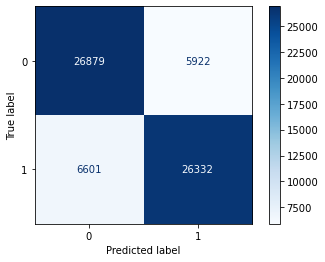

In [ ]:
clf_b=DecisionTreeClassifier(random_state=2017)
parameters={'max_depth':range(1,9),'min_samples_leaf':range(3,5),'criterion':['gini']}
clf_b, Xtrain_b, ytrain_b, Xtest_b,ytest_b=do_classify(clf, parameters,X,y,'roc_auc',n_folds=5,n_jobs=-1)

In [ ]:
print(classification_report(ytest_b,clf_b.predict(Xtest_b)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     32801
           1       0.82      0.80      0.81     32933

    accuracy                           0.81     65734
   macro avg       0.81      0.81      0.81     65734
weighted avg       0.81      0.81      0.81     65734



SCORE FUNC roc_auc
BEST {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4} 0.8873776167359786
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.81
[[26724  6077]
 [ 6439 26494]]
########################################################


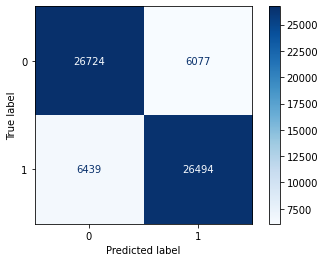

In [ ]:
clf_b=DecisionTreeClassifier(random_state=2017)
parameters={'criterion': ['gini'], 'max_depth': [8], 'min_samples_leaf': [4]}

clf_b, Xtrain_b, ytrain_b, Xtest_b,ytest_b=do_classify(clf_b, parameters,X,y,'roc_auc',n_folds=5,n_jobs=-1)


### Random Forest Classifier:

roc_auc
OOB_Score
Best Params:  (950, 6, 6)
Training Score:  0.82261
OOB Score:  0.820845
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.82
[[11636  5463]
 [ 3356 29545]]
########################################################


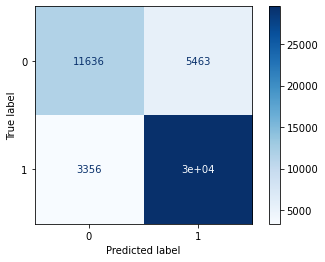

In [ ]:
rf=RandomForestClassifier(random_state=2017)
parameters={"n_estimators":np.arange(200,1200,250),'max_features':np.arange(2,8,2),'max_depth':np.arange(2,8,2)}
rf, Xtrain, ytrain, Xtest, ytest  = do_classify(rf, 
   parameters,train_dataX,train_dataY,"roc_auc", n_folds=5, n_jobs=-1,oob_func=True)

In [ ]:
print(classification_report(ytest,rf.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.73     17099
           1       0.84      0.90      0.87     32901

    accuracy                           0.82     50000
   macro avg       0.81      0.79      0.80     50000
weighted avg       0.82      0.82      0.82     50000



OOB_Score
Best Params:  (950, 6, 6)
Training Score:  0.82261
OOB Score:  0.820845
############# based on standard predict ################
Accuracy on training data: 0.82
Accuracy on test data:     0.82
[[11636  5463]
 [ 3356 29545]]
########################################################


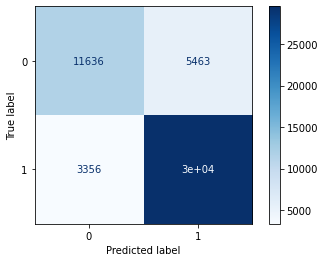

In [ ]:
parameters={"n_estimators":[950],'max_features':[6],'max_depth':[6]}

rf=RandomForestClassifier(random_state=2017)

rf, Xtrain, ytrain, Xtest, ytest  = do_classify(rf, 
   parameters,train_dataX,train_dataY,"roc_auc", n_folds=5, n_jobs=-1,oob_func=True)

In [ ]:
rimp=permutation_importance(rf,Xtest,ytest)

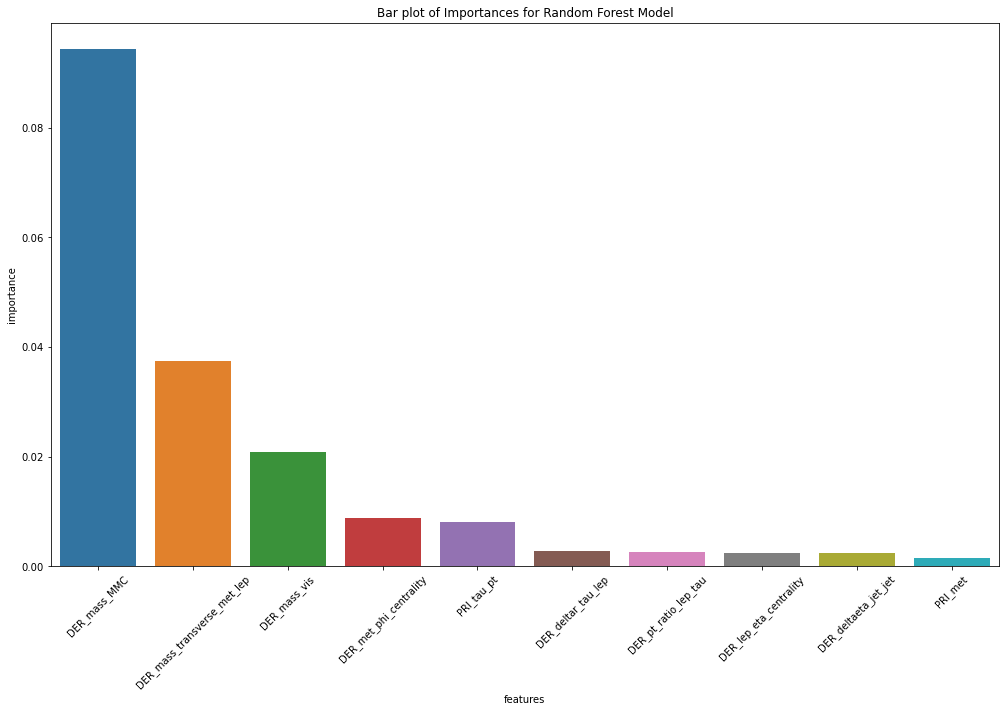

In [ ]:
rdf=p_importance(rf,Xtrain.columns,rimp['importances_mean'],rimp['importances_std'])
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=rdf[:10],x='features',y='importance',label='RandomForest_importances',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Random Forest Model");

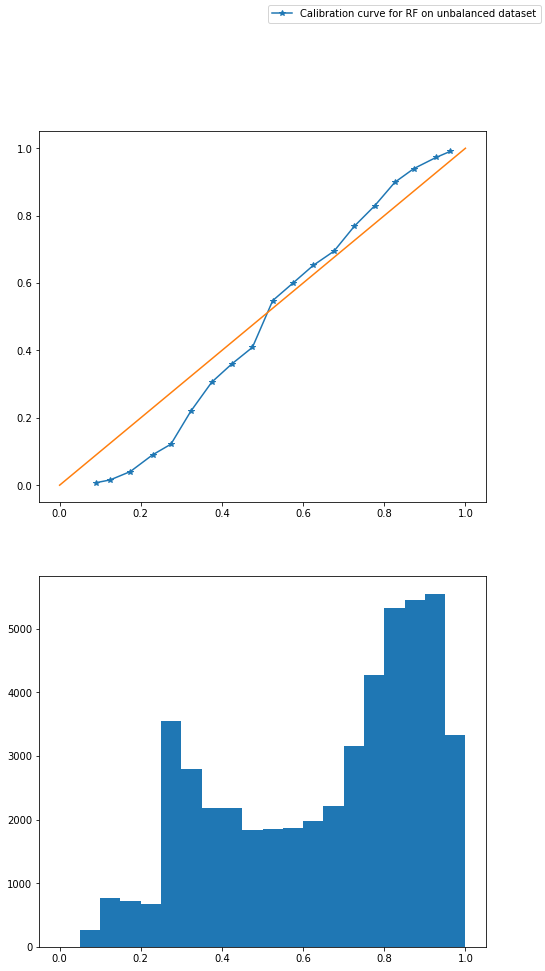

In [ ]:
calibration_plot("RF on unbalanced dataset",rf,Xtest,ytest)

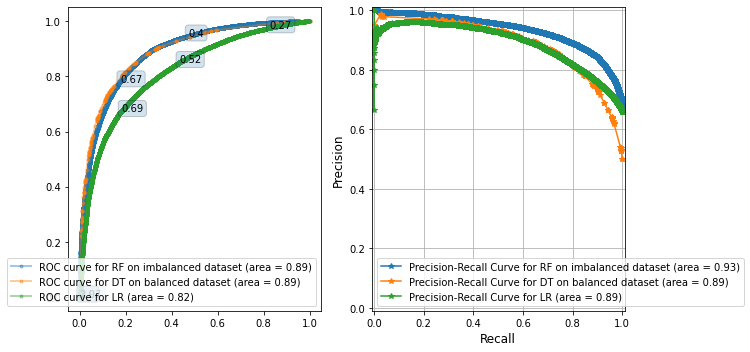

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

make_roc('RF on imbalanced dataset', rf,ytest ,Xtest, ax=ax[0],labe=5000, initial = False)
make_roc('DT on balanced dataset', clf_b,ytest_b ,Xtest_b, ax=ax[0],labe=5000, initial = False)
make_roc('LR', lr,ytest ,Xtest, ax=ax[0],labe=5000, initial = False)


make_pr('RF on imbalanced dataset',rf,ytest,Xtest,ax=ax[1])
make_pr('DT on balanced dataset',clf_b,ytest_b,Xtest_b,ax=ax[1])
make_pr('LR',lr,ytest,Xtest,ax=ax[1])


*We do the same now with the balanced dataset.*

Since, we know this is an imbalanced dataset, we will try out an upsampling downsampling for this purpose and run our model on the balanced dataset, to see how well our model does and if the upsampling helps.

roc_auc
OOB_Score
Best Params:  (950, 6, 6)
Training Score:  0.8123012794182526
OOB Score:  0.8106506625287146
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[27040  5761]
 [ 6754 26179]]
########################################################


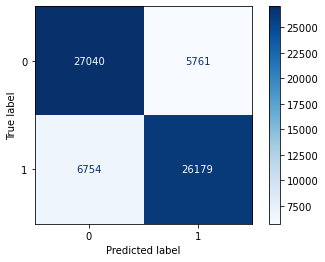

In [ ]:
clf2=RandomForestClassifier(random_state=2017)
parameters={"n_estimators":np.arange(200,1200,250),'max_features':np.arange(2,8,2),'max_depth':np.arange(2,8,2)}
rf2, Xtrain, ytrain, Xtest, ytest  = do_classify(clf2, 
   parameters,X,y,"roc_auc", n_folds=5, n_jobs=-1,oob_func=True)


In [ ]:
print(classification_report(ytest,clf2.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     32801
           1       0.82      0.79      0.81     32933

    accuracy                           0.81     65734
   macro avg       0.81      0.81      0.81     65734
weighted avg       0.81      0.81      0.81     65734



OOB_Score
Best Params:  (950, 6, 6)
Training Score:  0.8117079701215524
OOB Score:  0.8100649597614592
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[26922  5879]
 [ 6615 26318]]
########################################################


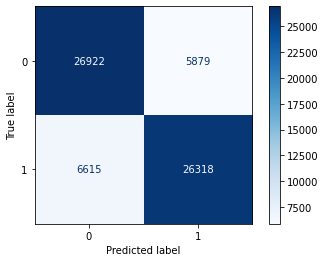

In [ ]:
parameters={"n_estimators":[950],'max_features':[6],'max_depth':[6]}

rf2=RandomForestClassifier(random_state=2017)

rf2, Xtrain_b, ytrain_b, Xtest_b, ytest_b = do_classify(rf2,parameters,X,y,"roc_auc", n_folds=5, n_jobs=-1,oob_func=True)

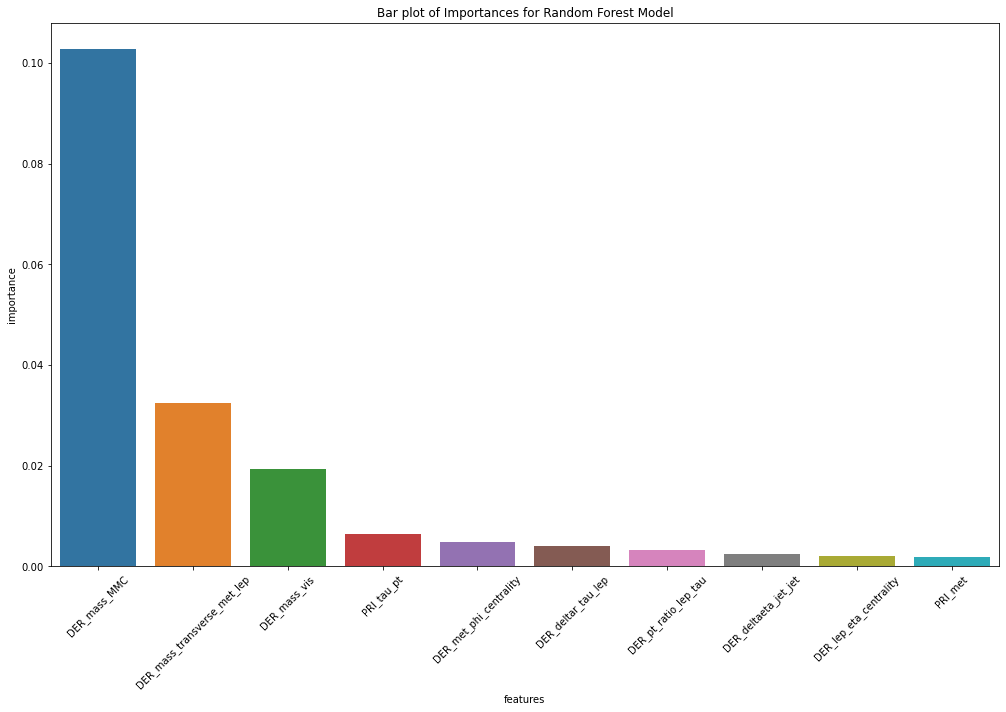

In [ ]:

rimp=permutation_importance(rf2,Xtest_b,ytest_b)
rdf=p_importance(rf2,Xtrain.columns,rimp['importances_mean'],rimp['importances_std'])
fig,ax=plt.subplots(figsize=(17,10))
sns.barplot(data=rdf[:10],x='features',y='importance',label='RandomForest_importances',ax=ax)
plt.xticks(rotation='45')
plt.title("Bar plot of Importances for Random Forest Model with Balanced data");

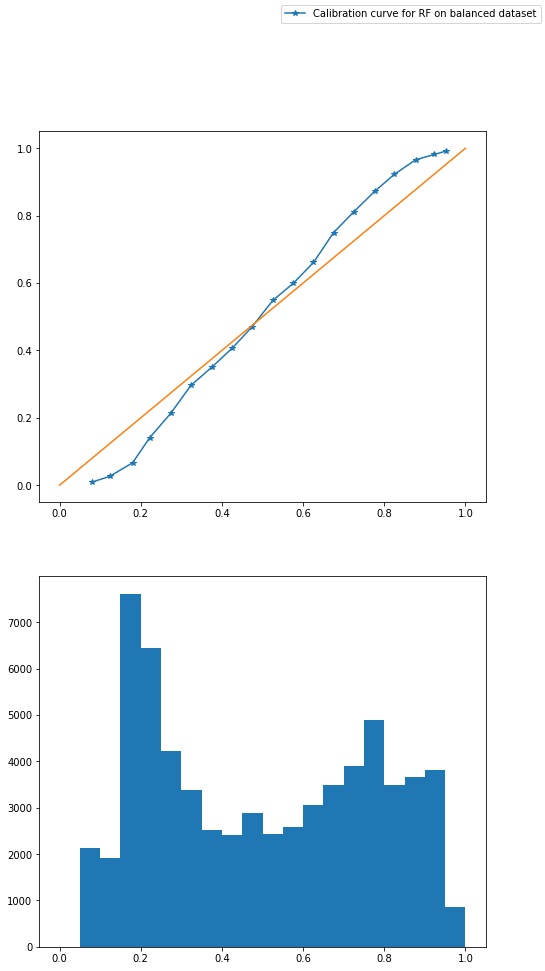

In [ ]:
calibration_plot("RF on balanced dataset",rf2,Xtest_b,ytest_b)

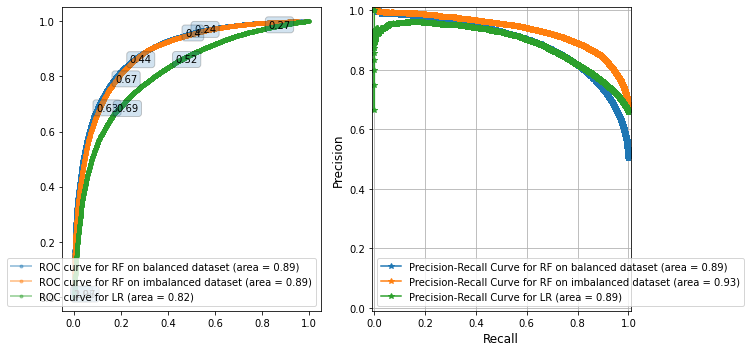

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

make_roc('RF on balanced dataset', rf2,ytest_b ,Xtest_b, ax=ax[0],labe=5000, initial = False)
make_roc('RF on imbalanced dataset', rf,ytest ,Xtest, ax=ax[0],labe=5000, initial = False)
make_roc('LR', lr,ytest ,Xtest, ax=ax[0],labe=5000, initial = False)


make_pr('RF on balanced dataset',rf2,ytest_b,Xtest_b,ax=ax[1])
make_pr('RF on imbalanced dataset',rf,ytest,Xtest,ax=ax[1])
make_pr('LR',lr,ytest,Xtest,ax=ax[1])


In [ ]:
X[features]

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltar_tau_lep,PRI_tau_pt,DER_met_phi_centrality,DER_pt_h,PRI_met
0,138.470,51.655,97.827,3.064,32.638,1.396,27.980,16.824
1,148.754,28.862,107.782,2.941,28.850,1.393,106.130,38.421
2,154.916,10.418,94.714,2.897,78.800,-1.305,29.169,22.275
3,128.053,88.941,69.272,1.609,54.646,0.538,193.392,132.678
4,111.026,32.096,75.271,3.205,30.606,-1.414,23.067,19.959
...,...,...,...,...,...,...,...,...
328661,609.296,99.573,350.921,3.646,20.728,0.712,263.043,91.910
328662,74.685,23.161,23.311,0.750,24.403,1.391,238.049,176.449
328663,-999.000,68.678,45.832,1.469,34.463,-1.400,10.192,42.139
328664,93.594,4.375,64.210,1.599,38.386,1.221,95.171,25.110


OOB_Score
Best Params:  (950, 6, 6)
Training Score:  0.8092229432598825
OOB Score:  0.8070788466566831
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[21606  4682]
 [ 5462 20837]]
########################################################


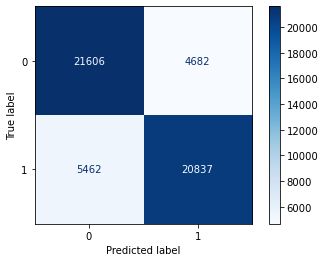

In [ ]:
Xtrain_imp,Xtest_imp,ytrain_imp,ytest_imp=train_test_split(X[features],y,train_size=0.8)

parameters={"n_estimators":[950],'max_features':[6],'max_depth':[6]}

rf2_imp=RandomForestClassifier(random_state=2017)

rf2_imp, Xtrain_b, ytrain_b, Xtest_b, ytest_b = do_classify(rf2_imp,parameters,Xtrain_imp,ytrain_imp,"roc_auc", n_folds=5, n_jobs=-1,oob_func=True)

In [ ]:
from sklearn.inspection import plot_partial_dependence

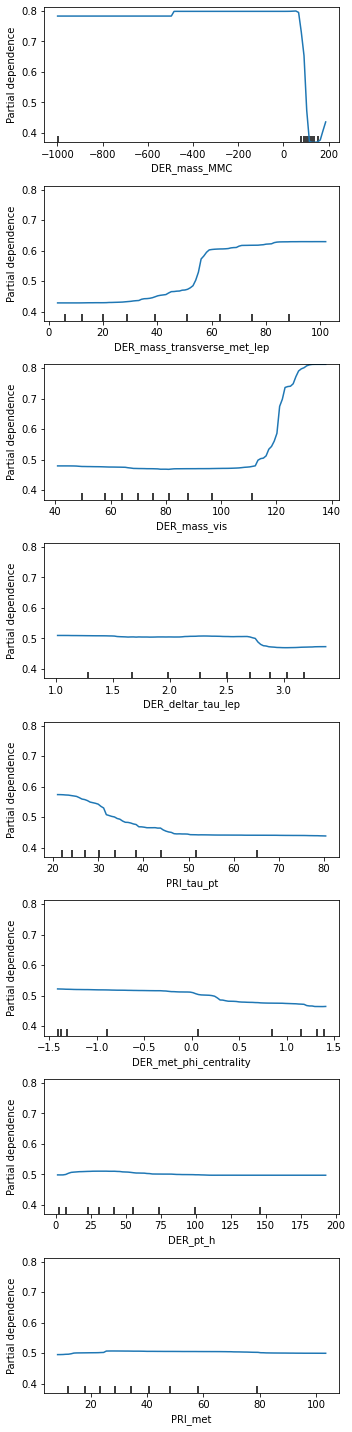

In [ ]:
fig, axes = plt.subplots(8, 1, figsize = (5, 20))

plot_partial_dependence(rf2_imp,Xtest_imp,features,ax=axes)

fig.tight_layout()

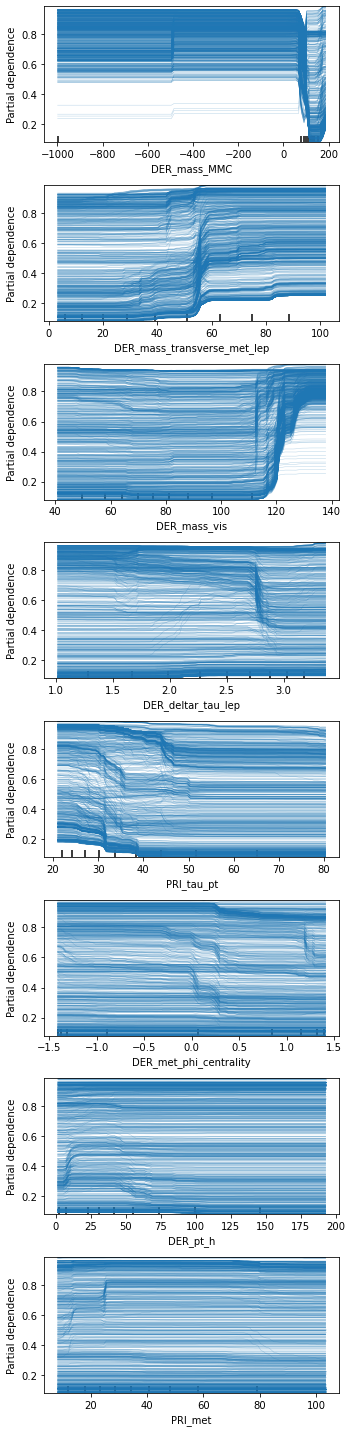

In [ ]:
fig, axes = plt.subplots(8, 1, figsize = (5, 20))

plot_partial_dependence(rf2_imp,Xtest_imp,features,ax=axes,kind="individual")

fig.tight_layout()

### Boosting without Balancing Dataset:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
Xtrain,Xtest,ytrain,ytest=train_test_split(train_dataX[features],train_dataY,train_size=0.8)
xgb_parameters= { 'n_estimators':np.arange(200,1000,200),'learning_rate': [0.001, 0.01, .1,.4, .45, .5, .55, .6] }

xgb_model=xgb.XGBClassifier(random_state=2017)


In [ ]:
xgb_random=RandomizedSearchCV(xgb_model,xgb_parameters,n_iter=15,cv=5,scoring='roc_auc')
xgb_random.fit(Xtrain,ytrain)
xgb_random.best_params_

print("Training accuracy",accuracy(Xtrain,ytrain,xgb_random))
print("Testing accuracy",accuracy(Xtest,ytest,xgb_random))

print(classification_report(ytest_f,y_pred_f))

In [ ]:
xgb_random.best_params_

{'n_estimators': 400, 'learning_rate': 0.1}

In [ ]:
Xtrain_feat,Xtest_feat,ytrain_feat,ytest_feat=train_test_split(train_dataX[features],train_dataY,train_size=0.8)


In [ ]:
xgb_model=xgb.XGBClassifier(n_estimators=400,learning_rate=0.1,random_state=2017)
xgb_model.fit(Xtrain_feat,ytrain_feat)


[10:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1,
              random_state=2017, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
print(classification_report(ytest_feat,xgb_model.predict(Xtest_feat)))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74     17175
           1       0.85      0.89      0.87     32825

    accuracy                           0.83     50000
   macro avg       0.81      0.80      0.80     50000
weighted avg       0.82      0.83      0.82     50000



In [ ]:
xgb_model.predict_proba(Xtest_feat)

array([[0.7847121 , 0.21528791],
       [0.02984715, 0.97015285],
       [0.21964246, 0.78035754],
       ...,
       [0.52122235, 0.47877768],
       [0.07036602, 0.929634  ],
       [0.01714987, 0.98285013]], dtype=float32)

<AxesSubplot:xlabel='Recall', ylabel='Precision'>

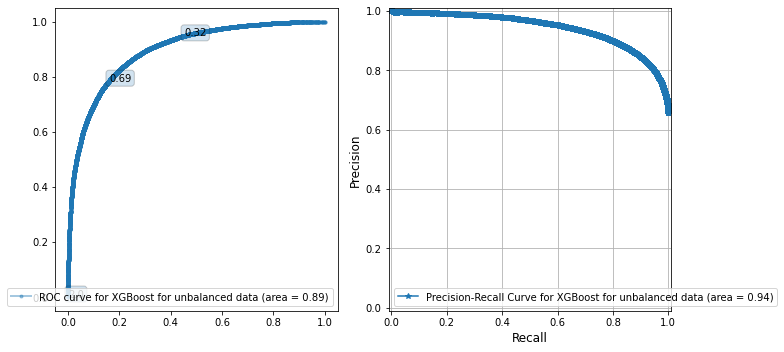

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

make_roc("XGBoost for unbalanced data",xgb_model,ytest_feat,Xtest_feat,ax=ax[0],labe=5000)
make_pr("XGBoost for unbalanced data",xgb_model,ytest_feat,Xtest_feat,ax=ax[1])



### Boosting with Balancing Dataset:



In [ ]:
Xtrain_feat_b,Xtest_feat_b,ytrain_feat_b,ytest_feat_b=train_test_split(X[features],y,train_size=0.8)

xgb_model_b=xgb.XGBClassifier(random_state=2017,n_estimators=400,learning_rate=0.1)

xgb_model_b.fit(Xtrain_feat_b,ytrain_feat_b)




C:\Users\abarp\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=12, num_parallel_tree=1,
              random_state=2017, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
print(classification_report(ytest_feat_b,xgb_model_b.predict(Xtest_feat_b)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     33020
           1       0.84      0.82      0.83     32714

    accuracy                           0.83     65734
   macro avg       0.83      0.83      0.83     65734
weighted avg       0.83      0.83      0.83     65734



<AxesSubplot:xlabel='Recall', ylabel='Precision'>

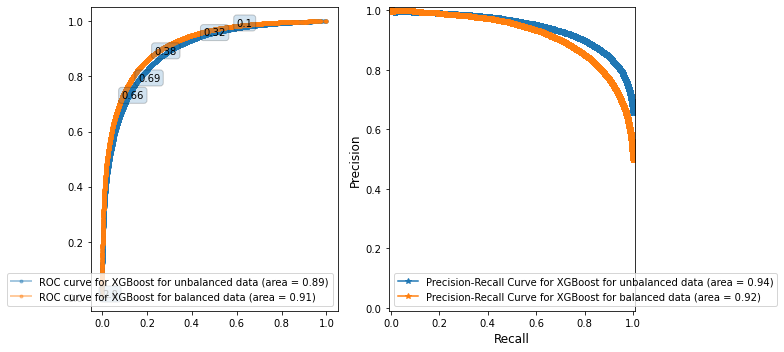

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

make_roc("XGBoost for unbalanced data",xgb_model,ytest_feat,Xtest_feat,ax=ax[0],labe=5000)
make_roc("XGBoost for balanced data",xgb_model_b,ytest_feat_b,Xtest_feat_b,ax=ax[0],labe=5000)


make_pr("XGBoost for unbalanced data",xgb_model,ytest_feat,Xtest_feat,ax=ax[1])
make_pr("XGBoost for balanced data",xgb_model_b,ytest_feat_b,Xtest_feat_b,ax=ax[1])

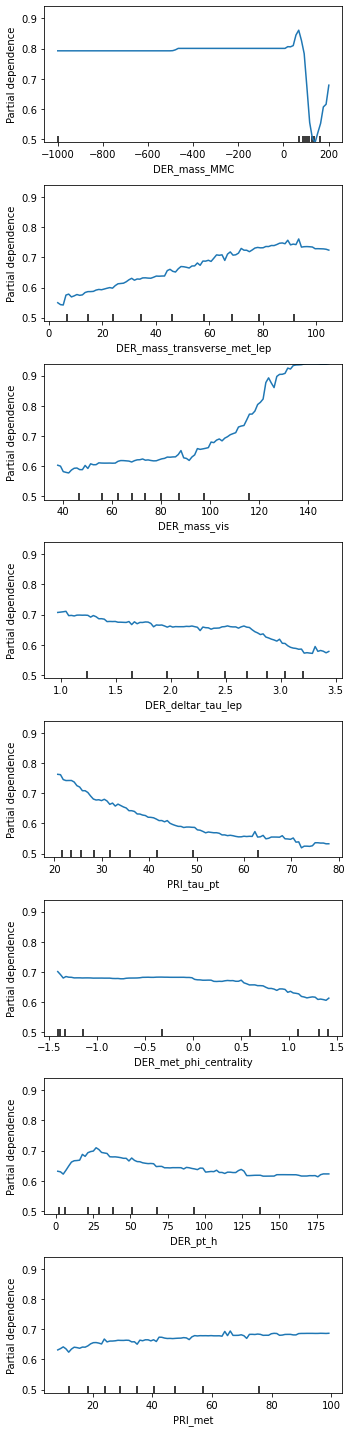

In [ ]:
fig, axes = plt.subplots(8, 1, figsize = (5, 20))

plot_partial_dependence(xgb_model,Xtest_feat,features,ax=axes)

fig.tight_layout()

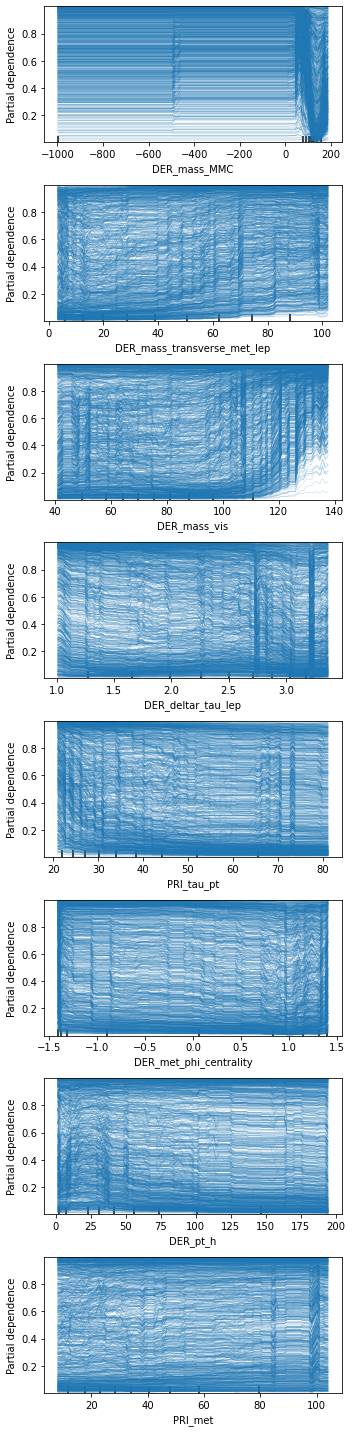

In [ ]:
fig, axes = plt.subplots(8, 1, figsize = (5, 20))

plot_partial_dependence(xgb_model_b,Xtest_feat_b,features,ax=axes,kind="individual")

fig.tight_layout()

### Results :

In [ ]:
def Save_Result_To_Csv(model,csv_file):
    
    test_pre = testing
    
    prediction = model.predict(test_pre)

    sub = pd.read_csv('random_submission.csv')
    
    test_predict = pd.DataFrame({"EventId":sub['EventId'],"RankOrder":sub['RankOrder'],"Class":prediction})
    test_predict['Class'] = test_predict['Class'].replace(1,'s')
    test_predict['Class'] = test_predict['Class'].replace(0,'b')
    test_predict.to_csv(csv_file,index=False)

In [ ]:
Save_Result_To_Csv(rf2,"Submission.csv")